
# Bifurcation diagram of fish models

Bifurcation diagrams allow us to visualise the impact of parameters on the solutions.

You can read more about them [here](https://math.libretexts.org/Bookshelves/Scientific_Computing_Simulations_and_Modeling/Introduction_to_the_Modeling_and_Analysis_of_Complex_Systems_(Sayama)/08%3A_Bifurcations/8.02%3A_Bifurcations_in_1-D_Continuous-Time_Models).

This notebook uses [BifrucationKit.jl](https://bifurcationkit.github.io/BifurcationKitDocs.jl/dev/).

In [15]:
using BifurcationKit
using Plots, Revise

const BK = BifurcationKit

BifurcationKit

# Simplistic fish model

In [16]:
function x_dot!(dx, x, p, t=0)
    (;h) = p
    dN = x .* (1 .- x) .- h
    dN
end

x_dot! (generic function with 2 methods)

## Bifurcation Diagram in $h$

In [17]:
par = (h=0., )

(h = 0.0,)

In [18]:
prob1 = BifurcationProblem(
    x_dot!, 
    [0.1], 
    par,
    (@optic _.h),   # Here we set the continuation parameter
    record_from_solution = (x, p; k...) -> x[1]
)

┌─ Bifurcation Problem with uType Vector{Float64}
├─ Inplace:  false
├─ Symmetric: false
└─ Parameter: h

In [19]:
continuation_bounds = ContinuationPar(
    p_min = 0., 
    p_max = 0.3, 
    n_inversion=4,
    dsmax=0.01,
    ds=0.0001,
    plot_every_step=100)

bd1 = bifurcationdiagram(prob1, 
    PALC(), 
    2, 
    continuation_bounds; 
    bothside = true)

┌ Warning: The zero eigenvalue is not that small λ = -0.00028698272047633644, this can alter the computation of the normal form. You can either refine the point using Newton or use a more precise bisection by increasing `n_inversion`
└ @ BifurcationKit ~/.julia/packages/BifurcationKit/tOafK/src/NormalForms.jl:82


[Bifurcation diagram]
 ┌─ From 0-th bifurcation point.
 ├─ Children number: 0
 └─ Root (recursion level 1)
      ┌─ Curve type: EquilibriumCont
      ├─ Number of points: 95
      ├─ Type of vectors: Vector{Float64}
      ├─ Parameter h starts at 0.0, ends at 0.0
      ├─ Algo: PALC
      └─ Special points:

- #  1, endpoint at h ≈ +0.00000000,                                                                     step =   0
- #  2,       bp at h ≈ +0.24999998 ∈ (+0.24999991, +0.24999998), |δp|=7e-08, [converged], δ = (-1,  0), step =  53
- #  3, endpoint at h ≈ +0.00000000,                                                                     step =  94


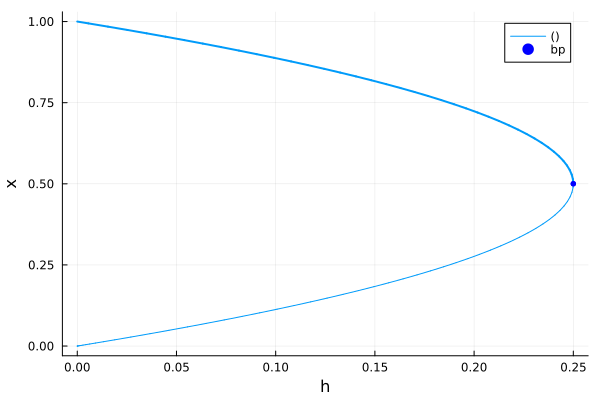

In [20]:
plot(bd1)

# Improved fish model

In [21]:
function x_dot!(dx, x, p, t=0)
    (;h, b) = p
    dN = x .* (1 .- x) .- h .* x ./ (b .+ x)
    dN
end

x_dot! (generic function with 2 methods)

In [22]:
par = (h=1., b=1.)

(h = 1.0, b = 1.0)

## Bifurcation Diagram in $h$

In [23]:
prob1 = BifurcationProblem(
    x_dot!, 
    [0.], 
    par,
    (@optic _.h),   # Here we set the continuation parameter
    record_from_solution = (x, p; k...) -> x[1]
)


┌─ Bifurcation Problem with uType Vector{Float64}
├─ Inplace:  false
├─ Symmetric: false
└─ Parameter: h

In [24]:
continuation_bounds = ContinuationPar(
    p_min = -0.5, 
    p_max = 4., 
    n_inversion=4)

bd1 = bifurcationdiagram(prob1, 
    PALC(), 
    2, 
    continuation_bounds; 
    bothside = true)

┌ Warning: The zero eigenvalue is not that small λ = 0.00022097086912065134, this can alter the computation of the normal form. You can either refine the point using Newton or use a more precise bisection by increasing `n_inversion`
└ @ BifurcationKit ~/.julia/packages/BifurcationKit/tOafK/src/NormalForms.jl:82
┌ Warning: The zero eigenvalue is not that small λ = 0.00022097086912065134, this can alter the computation of the normal form. You can either refine the point using Newton or use a more precise bisection by increasing `n_inversion`
└ @ BifurcationKit ~/.julia/packages/BifurcationKit/tOafK/src/NormalForms.jl:82
┌ Error: Newton failed to fully locate bifurcation point using bisection parameters!
└ @ BifurcationKit ~/.julia/packages/BifurcationKit/tOafK/src/Bifurcations.jl:208


[Bifurcation diagram]
 ┌─ From 0-th bifurcation point.
 ├─ Children number: 2
 └─ Root (recursion level 1)
      ┌─ Curve type: EquilibriumCont
      ├─ Number of points: 43
      ├─ Type of vectors: Vector{Float64}
      ├─ Parameter h starts at -0.5, ends at 4.0
      ├─ Algo: PALC
      └─ Special points:

- #  1, endpoint at h ≈ -0.50000000,                                                                     step =   0
- #  2,       bp at h ≈ +0.99977903 ∈ (+0.99977903, +1.00044194), |δp|=7e-04, [converged], δ = (-1,  0), step =  14
- #  3, endpoint at h ≈ +4.00000000,                                                                     step =  42


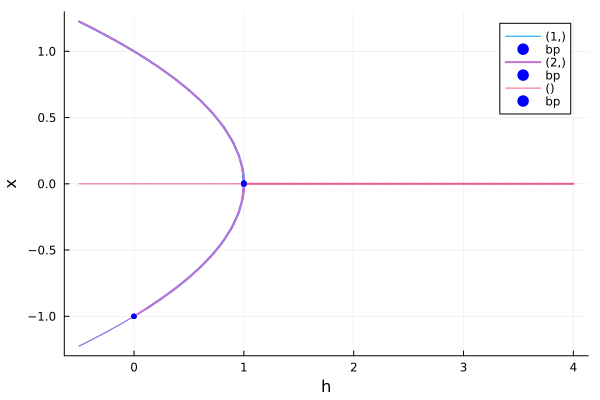

In [25]:
plot(bd1)

## Bufurcation Diagram in $b$

In [26]:
prob1 = BifurcationProblem(
    x_dot!, 
    [4.], 
    par,
    (@optic _.b),   # Here we set the continuation parameter
    record_from_solution = (x, p; k...) -> x[1]
)

prob2 = BifurcationProblem(
    x_dot!, 
    [-0.], 
    par,
    (@optic _.b),   # Here we set the continuation parameter
    record_from_solution = (x, p; k...) -> x[1]
)

┌─ Bifurcation Problem with uType Vector{Float64}
├─ Inplace:  false
├─ Symmetric: false
└─ Parameter: b

In [27]:
continuation_bounds = ContinuationPar(
    p_min = -1.5, 
    p_max = 4., 
    n_inversion=4)

bd1 = bifurcationdiagram(prob1, 
    PALC(), 
    2, 
    continuation_bounds; 
    bothside = true)

bd2 = bifurcationdiagram(prob2, 
    PALC(), 
    2, 
    continuation_bounds; 
    bothside = true)

┌ Warning: The zero eigenvalue is not that small λ = 71296.06808825141, this can alter the computation of the normal form. You can either refine the point using Newton or use a more precise bisection by increasing `n_inversion`
└ @ BifurcationKit ~/.julia/packages/BifurcationKit/tOafK/src/NormalForms.jl:82
┌ Warning: The bifurcating eigenvalue is not that close to Re = 0. We found 71296.06808825141 !≈ 0.  You can perhaps increase the argument `nev`.
└ @ BifurcationKit ~/.julia/packages/BifurcationKit/tOafK/src/NormalForms.jl:36
┌ Warning: The zero eigenvalue is not that small λ = 71296.06808825141, this can alter the computation of the normal form. You can either refine the point using Newton or use a more precise bisection by increasing `n_inversion`
└ @ BifurcationKit ~/.julia/packages/BifurcationKit/tOafK/src/NormalForms.jl:82
┌ Warning: The bifurcating eigenvalue is not that close to Re = 0. We found 71296.06808825141 !≈ 0.  You can perhaps increase the argument `nev`.
└ @ Bifurcat

[Bifurcation diagram]
 ┌─ From 0-th bifurcation point.
 ├─ Children number: 4
 └─ Root (recursion level 1)
      ┌─ Curve type: EquilibriumCont
      ├─ Number of points: 50
      ├─ Type of vectors: Vector{Float64}
      ├─ Parameter b starts at -1.5, ends at 4.0
      ├─ Algo: PALC
      └─ Special points:

- #  1, endpoint at b ≈ -1.50000000,                                                                     step =   0
- #  2,       bp at b ≈ -0.00001403 ∈ (-0.00001403, +0.00000324), |δp|=2e-05, [converged], δ = (-1,  0), step =  11
- #  3,       bp at b ≈ +1.00022097 ∈ (+0.99955806, +1.00022097), |δp|=7e-04, [converged], δ = ( 1,  0), step =  24
- #  4, endpoint at b ≈ +4.00000000,                                                                     step =  49


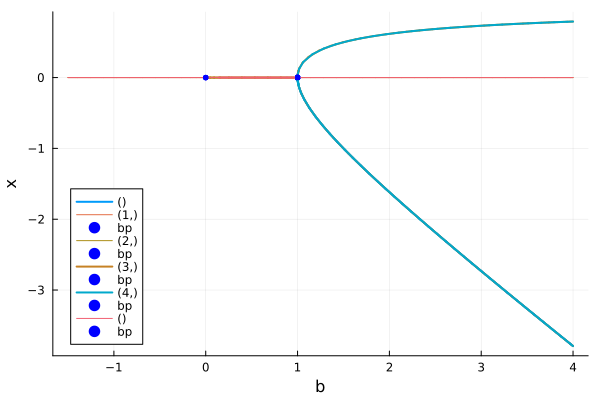

In [28]:
plot(bd1)
plot!(bd2)